March 2023

In this notebook, I'll walk through an example of how to import Python packages, read and manipulate a netcdf file, and create a plot of temperatures simulated by a climate model. In the blank sections below, use this example as a template to do the same for precipitation.

## Load Python packages

You only need to do this once at the top of any Python script or Jupyter notebook

In [8]:
import xarray as xr
import netCDF4 as nc
import numpy as np

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

# Example for slicing and plotting Rocky Mountain topography data

## Open temperature data

In [15]:
# netcdf file name
dfile = 'diagnostic_vars_2680-2999.E2pt1_PIctrl_restart.nc'

# read in the netcdf file with xarray
ds    = xr.open_dataset(dfile)

# extract 'tsurf', 'lat', and 'lon' variables from the dataset
lat   = ds.lat
lon   = ds.lon
month = ds.month
air_temp  = ds.tsurf

One nice aspect of the xarray package is that you can see information about data variables by simply writing the name of the variable in a cell and running it. Try it here for the surface air temperature data:

In [10]:
air_temp

<xarray.DataArray 'tsurf' (month: 12, lat: 90, lon: 144)>
[155520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 90.0
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
Dimensions without coordinates: month
Attributes:
    units:      C
    long_name:  SURFACE AIR TEMPERATURE

The file 'diagnostic_vars_2680-2999.E2pt1_PIctrl_restart.nc' contains many other climate variables in addition to temperature. If you want to play around with plotting some of those, you can similarly get information about the variable names by writing in the dataset name and running the cell: 

In [25]:
ds

<xarray.Dataset>
Dimensions:    (lat: 90, lon: 144, month: 12)
Coordinates:
  * lat        (lat) float32 -90.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 90.0
  * lon        (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
Dimensions without coordinates: month
Data variables:
    prec       (month, lat, lon) float32 ...
    qatm       (month, lat, lon) float32 ...
    srnf_toa   (month, lat, lon) float32 ...
    trnf_toa   (month, lat, lon) float32 ...
    swcrf_toa  (month, lat, lon) float32 ...
    lwcrf_toa  (month, lat, lon) float32 ...
    pcldt      (month, lat, lon) float32 ...
    plan_alb   (month, lat, lon) float32 ...
    wsurf      (month, lat, lon) float32 ...
    tsurf      (month, lat, lon) float32 -29.29 -29.29 -29.29 ... -34.94 -34.94

## Slice data over the Rocky Mountains

In [11]:
# define North America lat-lon boundaries (30°-60°N, 130°W-100°W)
lat_min = 30  
lat_max = 60
lon_min = -130 
lon_max = -100 

# slice temperature data
air_temp_rm = air_temp.sel(lat=slice(lat_min,lat_max),lon=slice(lon_min,lon_max))

## Plot Rocky Mountain Air Temperature as a Map

Because we sliced the data, we should only have contours plotted for grid cells within the pre-defined lat and lon bounds. 

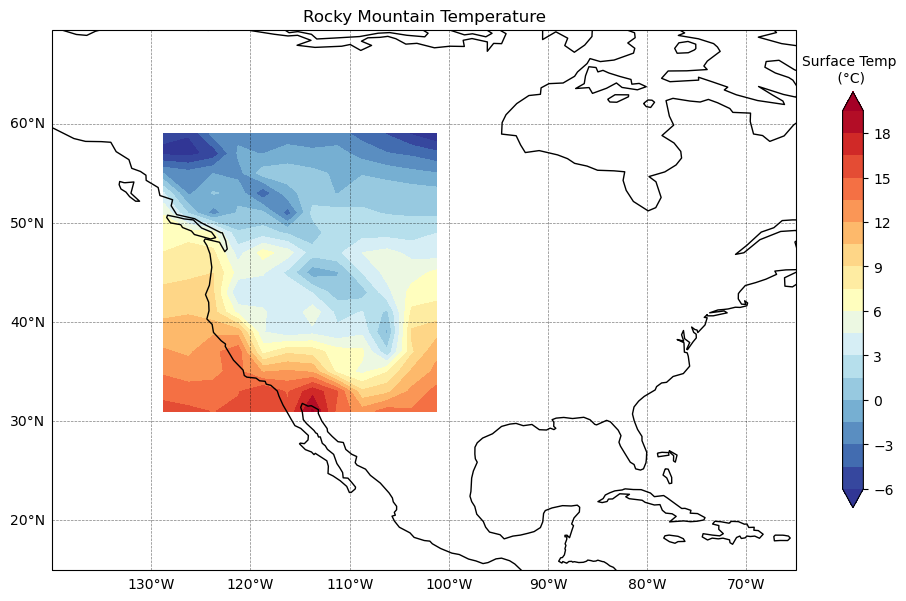

In [12]:
# Define map projection using Cartopy
trans = ccrs.PlateCarree()
proj  = ccrs.PlateCarree()

# Set figure and axes properties
fig = plt.figure(figsize=(12, 9))
ax  = plt.subplot(111, projection=proj)
ax.set_title(("Rocky Mountain Temperature"))

# Set colormap properties
cmap = plt.get_cmap('RdYlBu_r')
levels = 20

# Plot contours of Rocky Mountain mean annual surface temperature
cf = ax.contourf(air_temp_rm.lon, air_temp_rm.lat, air_temp_rm.mean(dim="month"),
                 cmap=cmap, levels=levels, extend='both',
                 transform=trans)
# Plot colorbar
cbar = fig.colorbar(cf, shrink=0.6, orientation='vertical',ax=ax)
cbar.set_label('Surface Temp\n (°C)', labelpad=-32, y=1.15, rotation=0)

# Add coastlines and set map boundaries
ax.coastlines()
ax.set_extent([-140, -65, 15, 65])
gl = ax.gridlines(crs=trans, linewidth=.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.top_labels = False; gl.right_labels = False;


## Plot Rocky Mountain Air Temperature as a timeseries

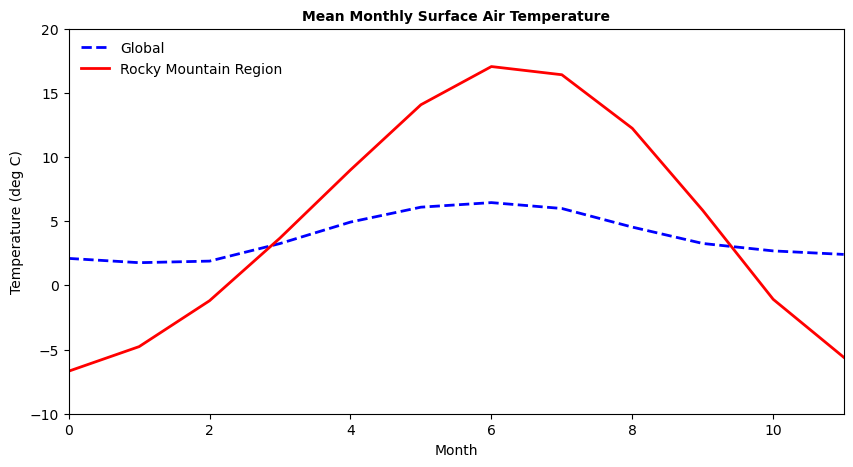

In [24]:
# The air temperature data has 3-dimensions (lat, lon, time). 
# To plot a timeseries of surface air temperature for the whole region,
# we therefore need to take the mean along the lat and lon dimensions
air_temp_rm_ts = air_temp_rm.mean(dim=['lat','lon'])

# taking the average of the original temp variable will give us a global mean surface temperature
# curve to compare the Rocky Mountain data to
air_temp_global_ts = air_temp.mean(dim=['lat','lon'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.set_title(("Mean Monthly Surface Air Temperature"), fontsize=10, fontweight='bold')

ax.plot(month, air_temp_global_ts, color='blue', linewidth=2, linestyle='--', label='Global')
ax.plot(month, air_temp_rm_ts, color='red', linewidth=2, linestyle='-', label='Rocky Mountain Region')

ax.set(xlabel='Month', xlim=[0,11],
       ylabel='Temperature (deg C)', ylim=[-10,20])

ax.legend(loc='upper left', frameon=False, fontsize=10)


# Slicing and plotting precipitation data over South America

The file 'imerg.gissE2pt1_grid.nc' contains global precipitation data. Using the example above, try reading it in and making a plot of rainfall over the Andes Mountains.

## Open dataset and create precipitation variable

In [ ]:
# netcdf file name
dfile = 'imerg.gissE2pt1_grid.nc'

# read in the netcdf file with xarray


# extract 'precipitation', 'lat', and 'lon' variables from the dataset


# calculate mean annual precipitation


## Slice data over western South America

In [ ]:
# define western South American lat-lon boundaries (lat: 53°S-10°N, lon: 82°W-62°W)


# slice precipitation data


## Plot western South American Rainfall

In [ ]:
# Define map projection using Cartopy
trans = ccrs.PlateCarree()
proj  = ccrs.PlateCarree()

# Set figure and axes properties
fig = plt.figure(figsize=(12, 9))
ax  = plt.subplot(111, projection=proj)
ax.set_title(("Western South American Rainfall"))

# Set colormap properties
cmap = plt.get_cmap('Blues')
levels = 25

# Plot contours of Rocky Mountain topography



# Plot colorbar



# Add coastlines and set map boundaries
ax.coastlines()
ax.set_extent([-90, -50, -55, 15])
gl = ax.gridlines(crs=trans, linewidth=.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.top_labels = False; gl.right_labels = False;